# Exercise 04: Eight-Point Algorithm

This exercise aims to help you to understand the implementation of the eight-point algorithm. Before starting the coding, we recommend you to review the corresponding content in chapter 5.

This exercise follows the same steps described in "Eight Point Algorithm" (page 14) with slight variant.

We will start from a synthetic example and then test on a real-world image.


In [91]:
# import necessary packages
import os
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from scipy.linalg import expm, logm
from exercise_code import exponentialSkewMat, generateRandomPts, constructEssentialMatrix, recoverPose, allReconstruction, loadPredefinedPts, testResults, visualizeReprojection
%load_ext autoreload
%autoreload 2

dataset_path = './'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part I. Synthetic data:

We first generate some random 3D points, one rotation matrix and one translation vector to simulate the real-world setting.

First of all, go to `exericese_code/utils.py` and implement the missing parts to generate some random points.
Here, we assume we have 12 points.

In [92]:
n_pts = 12
R_gt = exponentialSkewMat(np.random.randn(3))
T_gt = np.random.randn(3)

x1, x2, y1, y2, K1, K2, X1_gt = generateRandomPts(n_pts, R_gt, T_gt)

We next compute an approximation of  the essential matrix.
Go to `exercise_code/eight_point_alg.py` and implement the function `constructEssentialMatrix`.

In [93]:
E, U, Vt, S= constructEssentialMatrix(x1, x2, y1, y2, K1, K2)

Now, we can recover the displacement from the essential matrix. Go to `exercise_code/eight_point_alg.py` and implement the function `recoverPose`.

In [94]:
R1, R2, T1, T2 = recoverPose(U, Vt, S)

We then need to determine which pair of (R, T) is valid. When we find the valid one, also compute the 3D points.
Go to `exercise_code/eight_point_alg.py` and implement the function `reconstruct`.

In [95]:
R, T, X1, X2 = allReconstruction(x1, x2, y1, y2, R1, R2, T1, T2, K1, K2)

In [96]:
testResults(R_gt, T_gt, X1_gt, R, T, X1)

Estimation correct, mean error on pose is 1.13e-13, mean error on points is 3.49e-11


True

## Part II: Load data from real-world images

We now test our algorithm on a real-world sample.
First, we load the images and points, then visualize them.

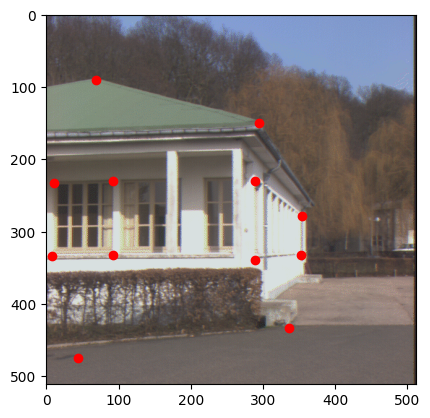

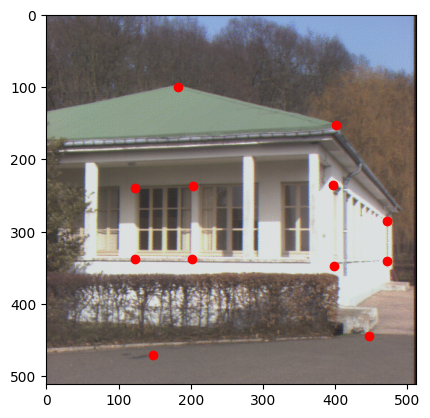

In [97]:
img_path1 = os.path.join(dataset_path, 'batinria0.tif')
img_path2 = os.path.join(dataset_path, 'batinria1.tif')

I1 = Image.open(img_path1)
x1, x2, y1, y2, K1, K2 = loadPredefinedPts()
plt.imshow(I1)
plt.plot(x1, y1, 'ro')
plt.show()

I2 = Image.open(img_path2)
plt.imshow(I2)
plt.plot(x2, y2, 'ro')
plt.show()

We can then apply the implemented algorithm to get (R, T) and 3D points.

In [98]:
E, U, Vt, S = constructEssentialMatrix(x1, x2, y1, y2, K1, K2)
R1, R2, T1, T2 = recoverPose(U, Vt, S)
R, T, X1, X2 = allReconstruction(x1, x2, y1, y2, R1, R2, T1, T2, K1, K2)

We can then visualize the projected 2d image points using the estimated 3D points and camera transformation

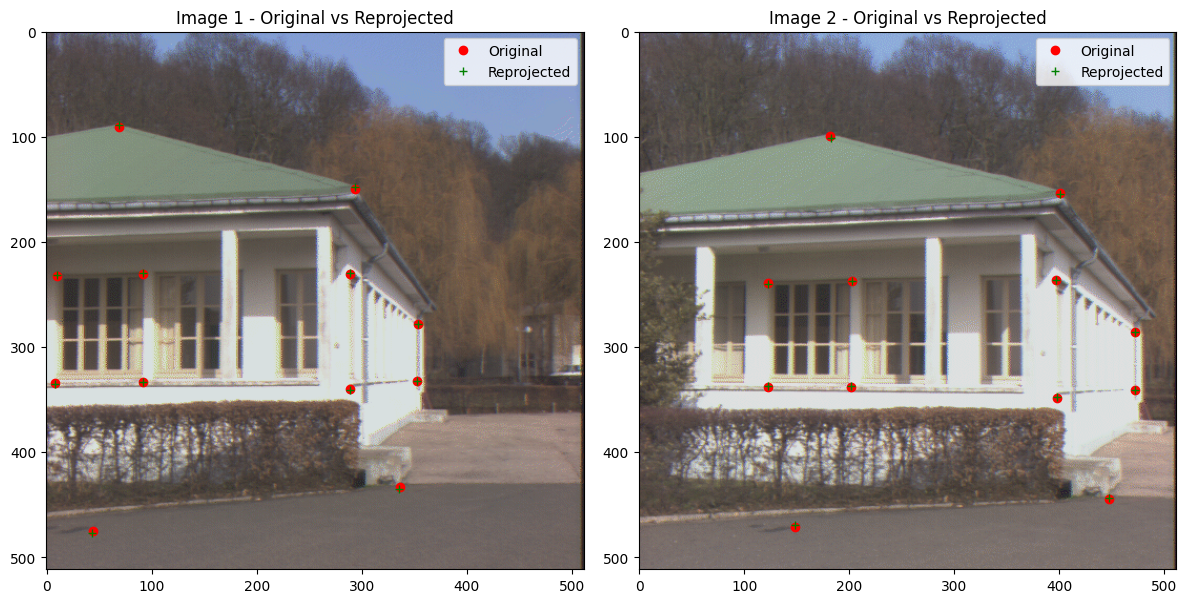

In [99]:
visualizeReprojection(I1, I2, x1, y1, x2, y2, X1, R, T, K1, K2)

In [100]:
from exercise_code.submit import submit_exercise

submit_exercise('../output/exercise04')

relevant folders: ['exercise_code']
notebooks files: ['8points_algorithm.ipynb']
Adding folder exercise_code
Adding notebook 8points_algorithm.ipynb
Zipping successful! Zip is stored under: d:\Study\TUM\Computer Vision\Computer Vision II Multiple View Geometry\Computer-Vision_Multiple-View-Geometry-\Practical Exercises\4\exercise_04_cleaned\output\exercise04.zip
